In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,plot_roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#check information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check the number missing values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#number of rows and columns
data.shape

(891, 12)

In [8]:
# axis=0 mens 0 repesent rows and axis=1 1 represent columns 
# drop cabin column
data=data.drop(columns='Cabin',axis=1)

In [9]:
# replace the missimng value age column 
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
print(data['Embarked'].mode()[0])

S


In [11]:
# replace the missimng value Embarked column
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# statistical data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
# not Survived is represent 0 & Survived pepole represnt 1
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

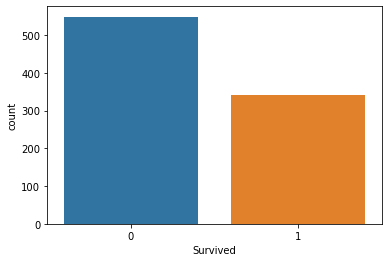

In [17]:
sns.countplot('Survived',data=data)
plt.show()

In [18]:

data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

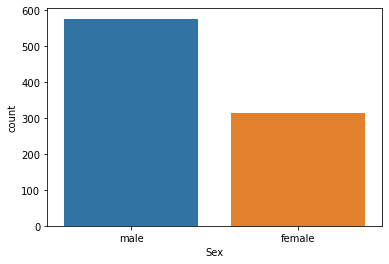

In [19]:

sns.countplot('Sex',data=data)
plt.show()

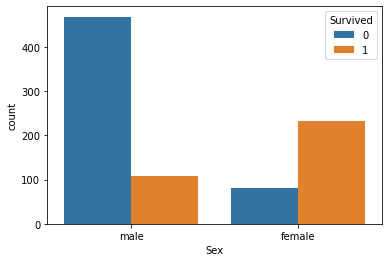

In [20]:
# number survivors gender wise
# not Survived is represent 0 & Survived pepole represnt 1
sns.countplot('Sex',hue='Survived',data=data)
plt.show()

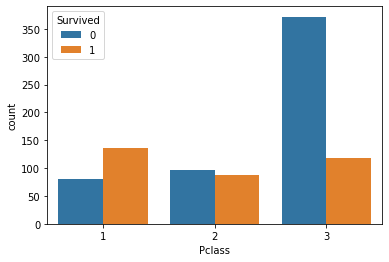

In [21]:
sns.countplot('Pclass',hue='Survived',data=data)
plt.show()

In [22]:

data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
data['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [24]:
#convert categorical column

In [25]:
data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [26]:
data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [28]:
x=data.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y=data['Survived']

In [29]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
correlation=data.corr()
correlation

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


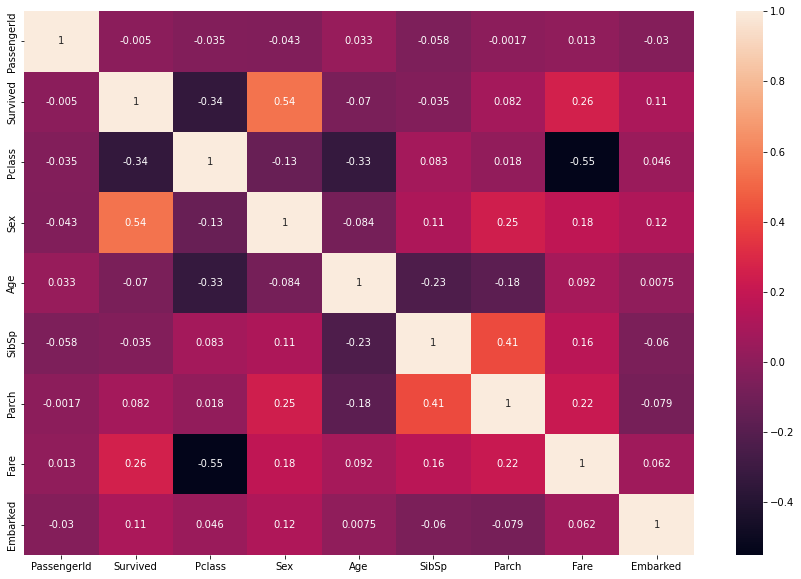

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [33]:
#shape correlation 
print('correlation matrix shape=',correlation.shape)

correlation matrix shape= (9, 9)


In [34]:
# spliting data train and test


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=2)


In [36]:

# show train and test data shape(rows&columns)
x_train.shape,x_test.shape

((445, 7), (446, 7))

In [37]:
# show train and test data shape(rows&columns)
y_train.shape,y_test.shape

((445,), (446,))

In [38]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [39]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8161434977578476

In [40]:
# use confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[241,  29],
       [ 53, 123]], dtype=int64)

In [41]:
from sklearn.model_selection import cross_val_score
clf=cross_val_score(LogisticRegression(),x,y,cv=5).mean()
clf

0.7934906785512524

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [43]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.7017937219730942

In [44]:
cvs=cross_val_score(Knn,x,y,cv=5).mean()
cvs

0.6858200991777038

In [45]:
#randomforestclassifir
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8139013452914798

In [46]:
rf=cross_val_score(rf,x,y,cv=5).mean()
rf

0.8126043562864854

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params={'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}

In [49]:
grid_search = GridSearchCV(RandomForestClassifier(),params,cv=10)

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [51]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 15}

In [52]:
rf=grid_search.best_estimator_

In [53]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=15)

In [54]:
rf.score(x_test,y_test)

0.8116591928251121

In [55]:
y_predict=rf.predict(x_test)

In [56]:
cfm=confusion_matrix(y_test,y_predict)

In [57]:
print(classification_report(y_test,y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       270
           1       0.83      0.65      0.73       176

    accuracy                           0.81       446
   macro avg       0.82      0.78      0.79       446
weighted avg       0.81      0.81      0.81       446

